In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [18]:
from urllib.request import url2pathname
# get URL
url = requests.get("https://en.wikipedia.org/wiki/Main_Page")


200
b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )e

In [20]:
# scrape webpage
soup = BeautifulSoup(url.content, 'html.parser')
 
# display scraped data
soup.prettify()

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(

In [22]:
# create object
object = soup.find(id="mp-left")
 
# find tags
items = object.find_all(class_="mp-h2")
result = items[0]
 
# display tags
result.prettify()

'<h2 class="mp-h2" id="mp-tfa-h2">\n <span id="From_today.27s_featured_article">\n </span>\n <span class="mw-headline" id="From_today\'s_featured_article">\n  From today\'s featured article\n </span>\n</h2>\n'

In [28]:
df = pd.read_html('https://en.wikipedia.org/wiki/\
Demographics_of_India',
 match='Population distribution by states/union territories')
df[0].head()

,Rank,State/UT,Population[48],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[49],Urban[49],Area[50] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.50,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.28,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.60,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.54,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.00,37612306,35014503,2597803,931,52537899,20059666,308245,236


In [29]:
states = df[0]['State/UT']
states

0                        Uttar Pradesh
1                          Maharashtra
2                                Bihar
3                          West Bengal
4                       Madhya Pradesh
5                           Tamil Nadu
6                            Rajasthan
7                            Karnataka
8                              Gujarat
9                       Andhra Pradesh
10                              Odisha
11                           Telangana
12                              Kerala
13                           Jharkhand
14                               Assam
15                              Punjab
16                        Chhattisgarh
17                             Haryana
18                          Delhi (UT)
19                   Jammu and Kashmir
20                         Uttarakhand
21                    Himachal Pradesh
22                             Tripura
23                           Meghalaya
24                             Manipur
25                       

In [30]:
population = my_table[0]['Population[48]']
population

0      199812341
1      112374333
2      104099452
3       91276115
4       72626809
5       72147030
6       68548437
7       61095297
8       60439692
9       49386799
10      41974218
11      35193978
12      33406061
13      32988134
14      31205576
15      27743338
16      25545198
17      25351462
18      16787941
19      12541302
20      10086292
21       6864602
22       3673917
23       2966889
24       2855794
25       1978502
26       1458545
27       1383727
28       1247953
29       1097206
30       1055450
31        610577
32        380581
33        343709
34        243247
35         64473
36    1210854977
Name: Population[48], dtype: int64

In [33]:
df2 = pd.DataFrame({'State': states, 
                    'Population': population})

df2.drop(df2.tail(1).index,
        inplace = True)
df2

,State,Population
0,Uttar Pradesh,199812341
1,Maharashtra,112374333
2,Bihar,104099452
3,West Bengal,91276115
4,Madhya Pradesh,72626809
5,Tamil Nadu,72147030
6,Rajasthan,68548437
7,Karnataka,61095297
8,Gujarat,60439692
9,Andhra Pradesh,49386799


<Axes: ylabel='State'>

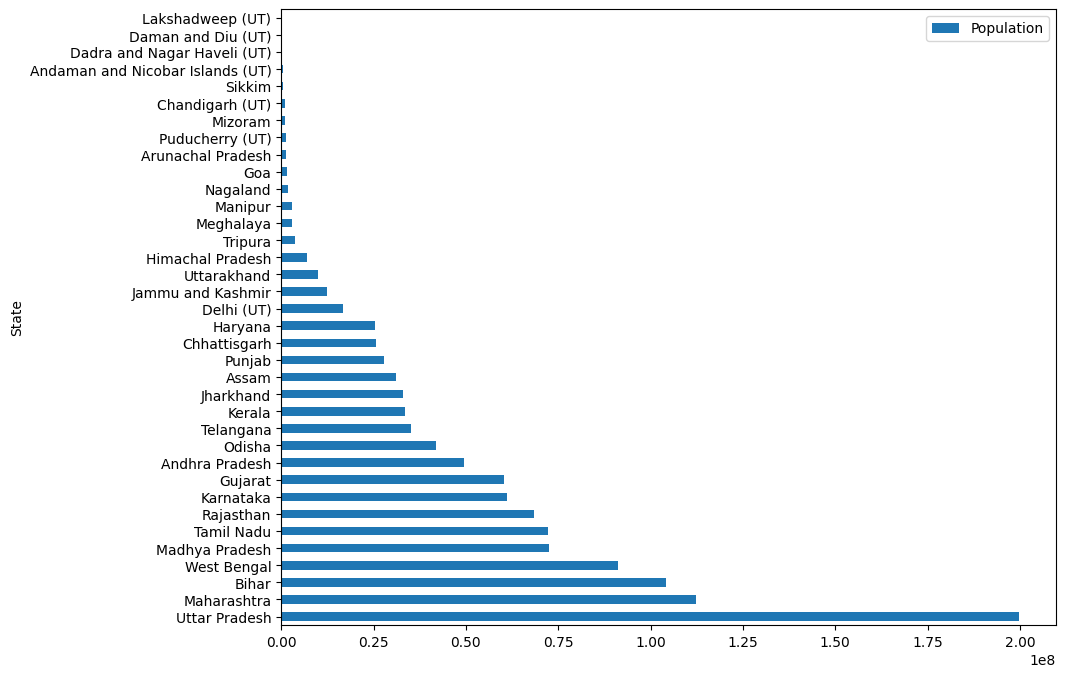

In [36]:
import matplotlib.pyplot as plt
  
df2.plot(x='State',y='Population',
         kind="barh",figsize=(10,8))